In [1]:
# loss = document.history.get('loss')
# acc = document.history.get('accuracy')
# val_loss = document.history.get('val_loss')
# val_acc = document.history.get('val_accuracy')
import os
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [137]:
filePath = './inverse_mnist'
os.listdir(filePath)

['1lr_0.01_init_he_normal_epoch_100_l2_0.001_testAcc_0.9781000018119812_run1.pickle',
 '1lr_0.01_init_he_normal_epoch_100_l2_0.001_testAcc_0.9782999753952026_run4.pickle',
 '1lr_0.01_init_he_normal_epoch_100_l2_0.001_testAcc_0.979200005531311_run3.pickle',
 '1lr_0.01_init_he_normal_epoch_100_l2_0.001_testAcc_0.9800999760627747_run2.pickle',
 '1lr_0.01_init_he_normal_epoch_100_l2_0.001_testAcc_0.9825999736785889_run5.pickle',
 'dataset_inverse_mnist_lr_0.01_init_he_normal_epoch_100_l2_0.001_testAcc_0.3928999900817871_run4.pickle',
 'dataset_inverse_mnist_lr_0.01_init_he_normal_epoch_100_l2_0.001_testAcc_0.4059999883174896_run3.pickle',
 'dataset_inverse_mnist_lr_0.01_init_he_normal_epoch_100_l2_0.001_testAcc_0.421099990606308_run5.pickle',
 'dataset_inverse_mnist_lr_0.01_init_he_normal_epoch_100_l2_0.001_testAcc_0.4214000105857849_run2.pickle',
 'dataset_inverse_mnist_lr_0.01_init_he_normal_epoch_100_l2_0.001_testAcc_0.5673999786376953_run1.pickle']

In [138]:
checkpoint_list = os.listdir(filePath)
params_list = []
for key in checkpoint_list:
    params = key[:35]
    if params not in params_list:
        params_list.append(params)
        print(params)

1lr_0.01_init_he_normal_epoch_100_l
dataset_inverse_mnist_lr_0.01_init_


In [139]:
params_list

['1lr_0.01_init_he_normal_epoch_100_l', 'dataset_inverse_mnist_lr_0.01_init_']

In [140]:
check_save_list = []
for params in params_list:
    check_save = []
    for key in checkpoint_list:
        if params in key:
            check_save.append(key)
    check_save_list.append(check_save)           

In [141]:
check_save_list

[['1lr_0.01_init_he_normal_epoch_100_l2_0.001_testAcc_0.9781000018119812_run1.pickle',
  '1lr_0.01_init_he_normal_epoch_100_l2_0.001_testAcc_0.9782999753952026_run4.pickle',
  '1lr_0.01_init_he_normal_epoch_100_l2_0.001_testAcc_0.979200005531311_run3.pickle',
  '1lr_0.01_init_he_normal_epoch_100_l2_0.001_testAcc_0.9800999760627747_run2.pickle',
  '1lr_0.01_init_he_normal_epoch_100_l2_0.001_testAcc_0.9825999736785889_run5.pickle'],
 ['dataset_inverse_mnist_lr_0.01_init_he_normal_epoch_100_l2_0.001_testAcc_0.3928999900817871_run4.pickle',
  'dataset_inverse_mnist_lr_0.01_init_he_normal_epoch_100_l2_0.001_testAcc_0.4059999883174896_run3.pickle',
  'dataset_inverse_mnist_lr_0.01_init_he_normal_epoch_100_l2_0.001_testAcc_0.421099990606308_run5.pickle',
  'dataset_inverse_mnist_lr_0.01_init_he_normal_epoch_100_l2_0.001_testAcc_0.4214000105857849_run2.pickle',
  'dataset_inverse_mnist_lr_0.01_init_he_normal_epoch_100_l2_0.001_testAcc_0.5673999786376953_run1.pickle']]

In [142]:
all_acc = []
for paras in check_save_list:
    acc_list =[]
    for key in paras:
        with open(filePath +'/'+key, 'rb') as f:
            history = pickle.load(f)
            val_accuracy = history['val_accuracy']
            acc_list.append(val_accuracy[-1])
    all_acc.append(acc_list + [np.average(acc_list),np.std(acc_list),np.max(acc_list)])

In [ ]:
for key in all_acc:
    print (key)

In [144]:
for key in check_save_list:
    with open(filePath +'/'+key[4], 'rb') as f:
        history = pickle.load(f)
        val_accuracy = history['val_accuracy']
        train_accuray = history['accuracy']
    epoch = range(1,len(train_accuray)+1)
    plt.plot(epoch,train_accuray,'rs-',label = 'training accuracy')
    plt.plot(epoch,val_accuracy,'b*-',label='test accuracy')
    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim((0.9,1.01))
    plt.savefig('./save_img/'+key[4][:-5] + 'acc.jpg' )
    plt.close()
    
for key in check_save_list:
    with open(filePath +'/'+key[4], 'rb') as f:
        history = pickle.load(f)
        val_accuracy = history['val_loss']
        train_accuray = history['loss']
    epoch = range(1,len(train_accuray)+1)
    plt.plot(epoch,train_accuray,'rs-',label = 'train loss')
    plt.plot(epoch,val_accuracy,'b*-',label='test loss')
    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
#     plt.ylim((0.9,1.01))
    plt.savefig('./save_img/'+key[4][:-5] + 'loss.jpg' )
    plt.close()

In [3]:
with open('./mnist/dataset_mnist_lr_0.01_init_he_normal_epoch_80_l2_0.001_testAcc_0.9901999831199646_run1.pickle', 'rb') as f:
    history = pickle.load(f)
val_accuracy = history['val_accuracy']
train_accuray = history['accuracy']

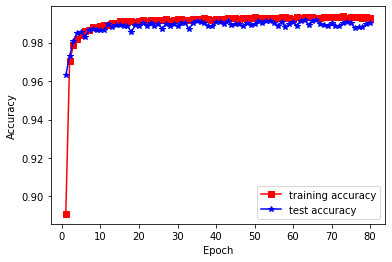

In [5]:
import matplotlib.pyplot as plt
epoch = range(1,len(train_accuray)+1)
plt.plot(epoch,train_accuray,'rs-',label = 'training accuracy')
plt.plot(epoch,val_accuracy,'b*-',label='test accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
# plt.title('dataset_fashion_mnist_lr_0.01_init_he_normal_epoch_60 ')
plt.savefig('dataset_fashion_mnist_lr_0.01_init_he_normal_epoch_60.jpg')

In [6]:
with open('./mnist/dataset_mnist_lr_0.01_init_he_normal_epoch_80_l2_0.001_testAcc_0.9901999831199646_run1.pickle', 'rb') as f:
    history = pickle.load(f)
    val_accuracy = history['val_loss']
    train_accuray = history['loss']
epoch = range(1,len(train_accuray)+1)
plt.plot(epoch,train_accuray,'rs-',label = 'train loss')
plt.plot(epoch,val_accuracy,'b*-',label='test loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
#     plt.ylim((0.9,1.01))
plt.savefig('loss.jpg' )
plt.close()

### Data Visualization

In [82]:
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.datasets import mnist,cifar10,fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

In [83]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_test_inverse = 1.0 - x_test.astype('float32')

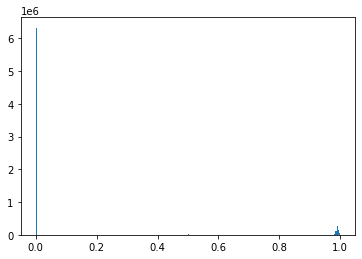

In [84]:
plt.hist(x_test.ravel(), bins=256, range=(0, 1.0)) #calculating histogram
plt.show()

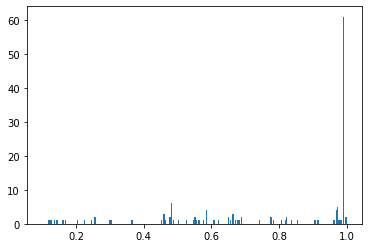

In [85]:
plt.hist(x_test[1,:,:,:].ravel(), bins=256, range=(0.1, 1.0)) #calculating histogram
plt.show()

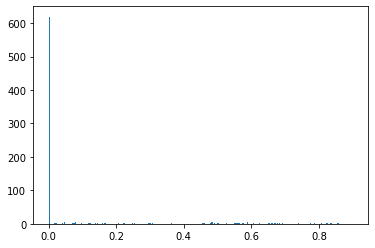

In [86]:
plt.hist(x_test[1,:,:,:].ravel(), bins=256, range=(0, 0.9)) #calculating histogram
plt.show()

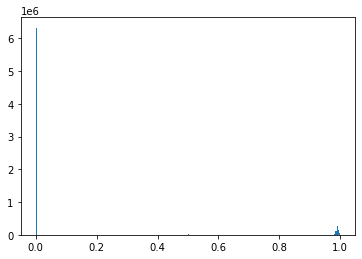

In [87]:
plt.hist(x_test.ravel(), bins=256, range=(0, 1.0)) #calculating histogram
plt.show()

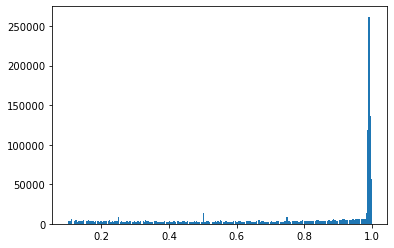

In [88]:
plt.hist(x_test.ravel(), bins=256, range=(0.1, 1.0)) #calculating histogram
plt.show()

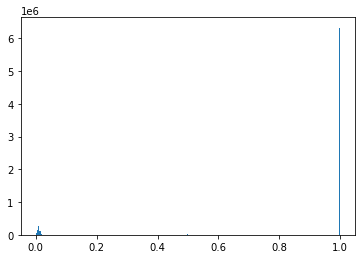

In [89]:
plt.hist(x_test_inverse.ravel(), bins=256, range=(0, 1.0)) #calculating histogram
plt.show()

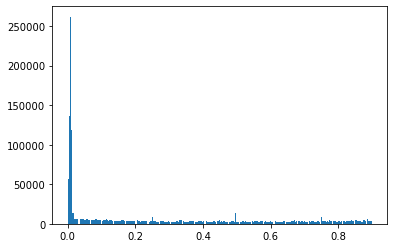

In [90]:
plt.hist(x_test_inverse.ravel(), bins=256, range=(0, 0.9)) #calculating histogram
plt.show()

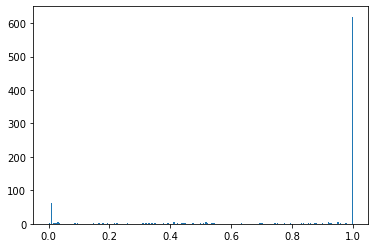

In [92]:
plt.hist(x_test_inverse[1,:,:,:].ravel(), bins=256, range=(0, 1)) #calculating histogram
plt.show()

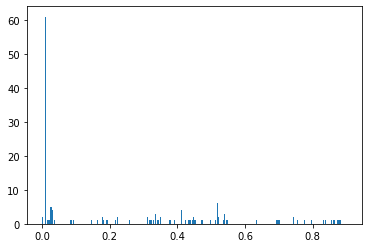

In [91]:
plt.hist(x_test_inverse[1,:,:,:].ravel(), bins=256, range=(0, 0.9)) #calculating histogram
plt.show()

### Plot the image

In [94]:
x_train_squeeze  = np.squeeze(x_train)
x_test_squeeze = np.squeeze(x_test)
x_test_inverse_squeeze = np.squeeze(x_test_inverse)

In [95]:
np.max(x_train_squeeze),np.min(x_train_squeeze)

(1.0, 0.0)

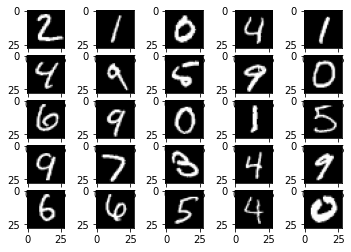

In [96]:
for i in range(1,26):
    plt.subplot(5,5,i)
    plt.imshow(x_test_squeeze[i], cmap='gray')
    
plt.savefig('MNIST_data.jpg')

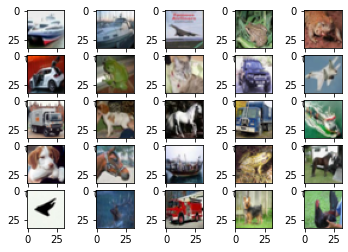

In [99]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.reshape(-1, 32, 32, 3)
x_test = x_test.reshape(-1, 32, 32, 3)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_test_inverse = 1.0 - x_test.astype('float32')
x_test_squeeze = np.squeeze(x_test)
for i in range(1,26):
    plt.subplot(5,5,i)
    plt.imshow(x_test[i])
    
plt.savefig('cifar10_data.jpg')

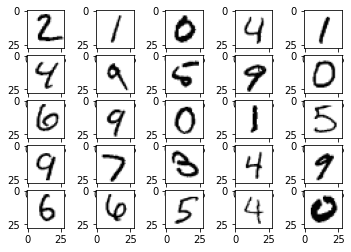

In [97]:
for i in range(1,26):
    plt.subplot(5,5,i)
    plt.imshow(x_test_inverse_squeeze[i], cmap='gray')
    plt.savefig('MNIST_inverse_data.jpg')

In [128]:
x_transform = x_test_squeeze*x_test_inverse_squeeze

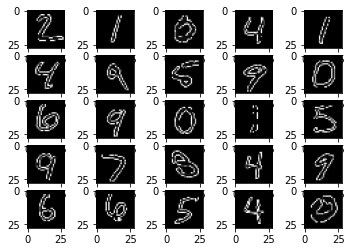

In [129]:
for i in range(1,26):
    plt.subplot(5,5,i)
    plt.imshow(x_transform[i], cmap='gray')
plt.savefig('transform_data.jpg')

### TSNE Plot for Dataset

In [61]:
from tensorflow.keras.datasets import mnist,cifar10,fashion_mnist
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# x_train = x_train.reshape(-1, 32, 32, 3)
x_test = x_test.reshape(-1, 32*32*3)
x_test.shape

(10000, 3072)

In [87]:
from matplotlib import cm
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

def plot_tsne(lowDWeights, labels,img_name,num_class):
    plt.cla()
    X, Y = lowDWeights[:, 0], lowDWeights[:, 1]
    class_name = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog',\
                    'frog', 'horse', 'ship', 'truck']
    for i in range(num_class):
        index = i == labels
        cur_class=class_name[i]
        c = cm.rainbow(int(255/9 * i))
        index  = np.squeeze(index)
        plt.scatter(X[index],Y[index],color = c,alpha = 0.5,s = 2, label=cur_class)
    plt.legend(loc='best', bbox_to_anchor=(1.0, 0.5)) 
    plt.xlim(X.min(), X.max())
    plt.ylim(Y.min(), Y.max()); plt.title(img_name)
    plt.savefig("{}.jpg".format(img_name),bbox_inches = 'tight')

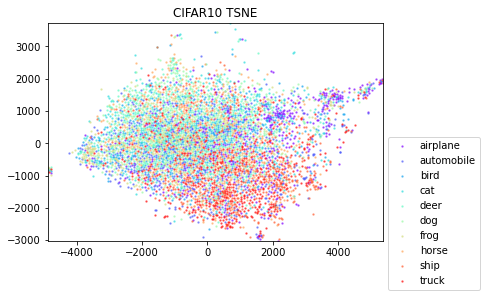

In [88]:
tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)
plot_only = 5000
low_dim_embs = tsne.fit_transform(x_test[:plot_only, :])
labels = y_test[:plot_only]
plot_tsne(low_dim_embs, labels,'CIFAR10 TSNE',10)

### MNIST

In [89]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# x_train = x_train.reshape(-1, 32, 32, 3)
x_test = x_test.reshape(-1, 28*28)
x_test.shape

(10000, 784)

In [93]:
def plot_tsne1(lowDWeights, labels,img_name,num_class):
    plt.cla()
    X, Y = lowDWeights[:, 0], lowDWeights[:, 1]
    class_name = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog',\
                    'frog', 'horse', 'ship', 'truck']
    for i in range(num_class):
        index = i == labels
        cur_class=class_name[i]
        c = cm.rainbow(int(255/9 * i))
        index  = np.squeeze(index)
        plt.scatter(X[index],Y[index],color = c,alpha = 0.5,s = 2, label=i)
    plt.legend(loc='best', bbox_to_anchor=(1.0, 0.7)) 
    plt.xlim(X.min(), X.max())
    plt.ylim(Y.min(), Y.max()); plt.title(img_name)
    plt.savefig("{}.jpg".format(img_name),bbox_inches = 'tight')

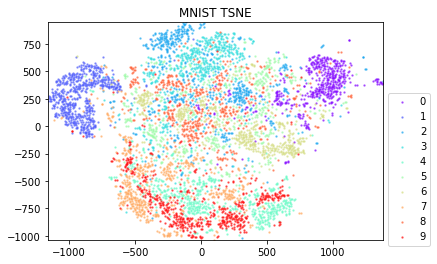

In [94]:
tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)
plot_only = 5000
low_dim_embs = tsne.fit_transform(x_test[:plot_only, :])
labels = y_test[:plot_only]
plot_tsne1(low_dim_embs, labels,'MNIST TSNE',10)

### Fashion NMIST

In [95]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
# x_train = x_train.reshape(-1, 32, 32, 3)
x_test = x_test.reshape(-1, 28*28)
x_test.shape

(10000, 784)

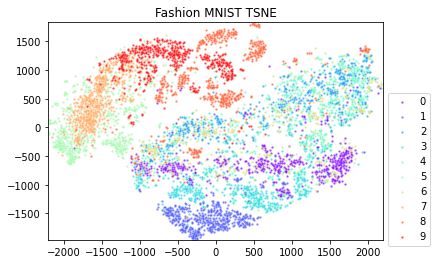

In [96]:
tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)
plot_only = 5000
low_dim_embs = tsne.fit_transform(x_test[:plot_only, :])
labels = y_test[:plot_only]
plot_tsne1(low_dim_embs, labels,'Fashion MNIST TSNE',10)